<a href="https://colab.research.google.com/github/Meemansha-spec/meem.github.io/blob/master/Volcano_eruption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the data and necessary libraries

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [103]:
train = pd.read_csv('../content/train.csv')

In [104]:
train.head()

,segment_id,time_to_eruption
0,1136037770,12262005
1,1969647810,32739612
2,1895879680,14965999
3,2068207140,26469720
4,192955606,31072429


In [105]:
from pylab import rcParams
rcParams ['figure.figsize'] = 12,5

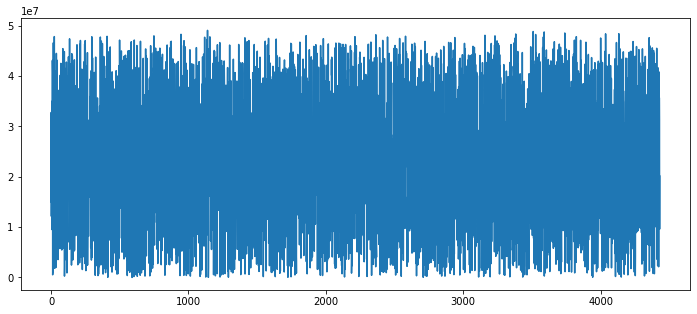

In [106]:
train['time_to_eruption'].plot()

In [107]:
train.shape

(4431, 2)

In [108]:
submission = pd.read_csv('../content/sample_submission.csv')

In [109]:
submission.head()

,segment_id,time_to_eruption
0,1000213997,0
1,100023368,0
2,1000488999,0
3,1001028887,0
4,1001857862,0


In [110]:
test = submission['segment_id']

In [111]:
test=pd.DataFrame(test)

In [112]:
test.head()

,segment_id
0,1000213997
1,100023368
2,1000488999
3,1001028887
4,1001857862


In [113]:
sensor_train = pd.read_csv('../content/sensor_train.csv')

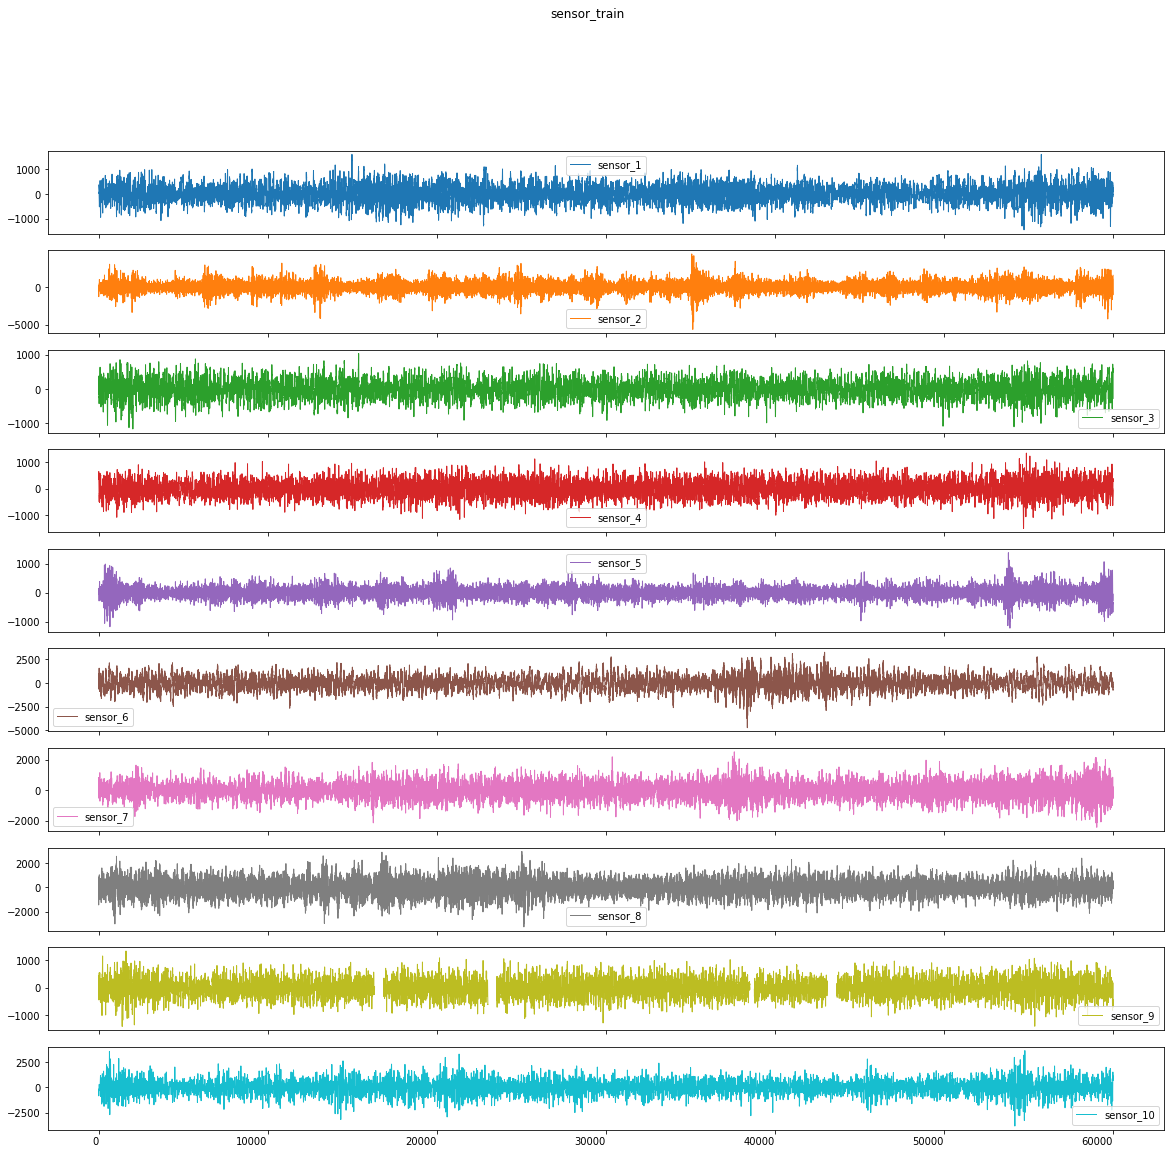

In [114]:
sensor_train.plot(figsize=(20,20),
                       subplots=True, 
                       layout=(10,1),
                       rot=0, 
                       lw=1, 
                       #colormap='jet',
                       title='sensor_train'
                      )

plt.show();

In [115]:
sensor_train.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,362.0,-593.0,-102.0,566.0,12.0,-219.0,839.0,846.0,-66.0,-306.0
1,353.0,-654.0,-96.0,523.0,51.0,-48.0,818.0,458.0,3.0,-276.0
2,354.0,-444.0,-161.0,453.0,95.0,7.0,661.0,175.0,100.0,-244.0
3,318.0,-330.0,-80.0,414.0,129.0,-199.0,475.0,-225.0,214.0,-236.0
4,319.0,-344.0,-93.0,372.0,142.0,-468.0,211.0,-426.0,270.0,-254.0


In [116]:
sensor_test = pd.read_csv('../content/sensor_test.csv')

In [117]:
sensor_test.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,NaN,165.0,241.0,537.0,NaN,-352.0,-735.0,192.0,NaN,NaN
1,NaN,-250.0,425.0,613.0,NaN,-327.0,-682.0,195.0,NaN,NaN
2,NaN,-527.0,-874.0,194.0,NaN,-335.0,-670.0,190.0,NaN,NaN
3,NaN,-258.0,748.0,11.0,NaN,-365.0,-660.0,142.0,NaN,NaN
4,NaN,-75.0,-1389.0,478.0,NaN,-386.0,-620.0,458.0,NaN,NaN


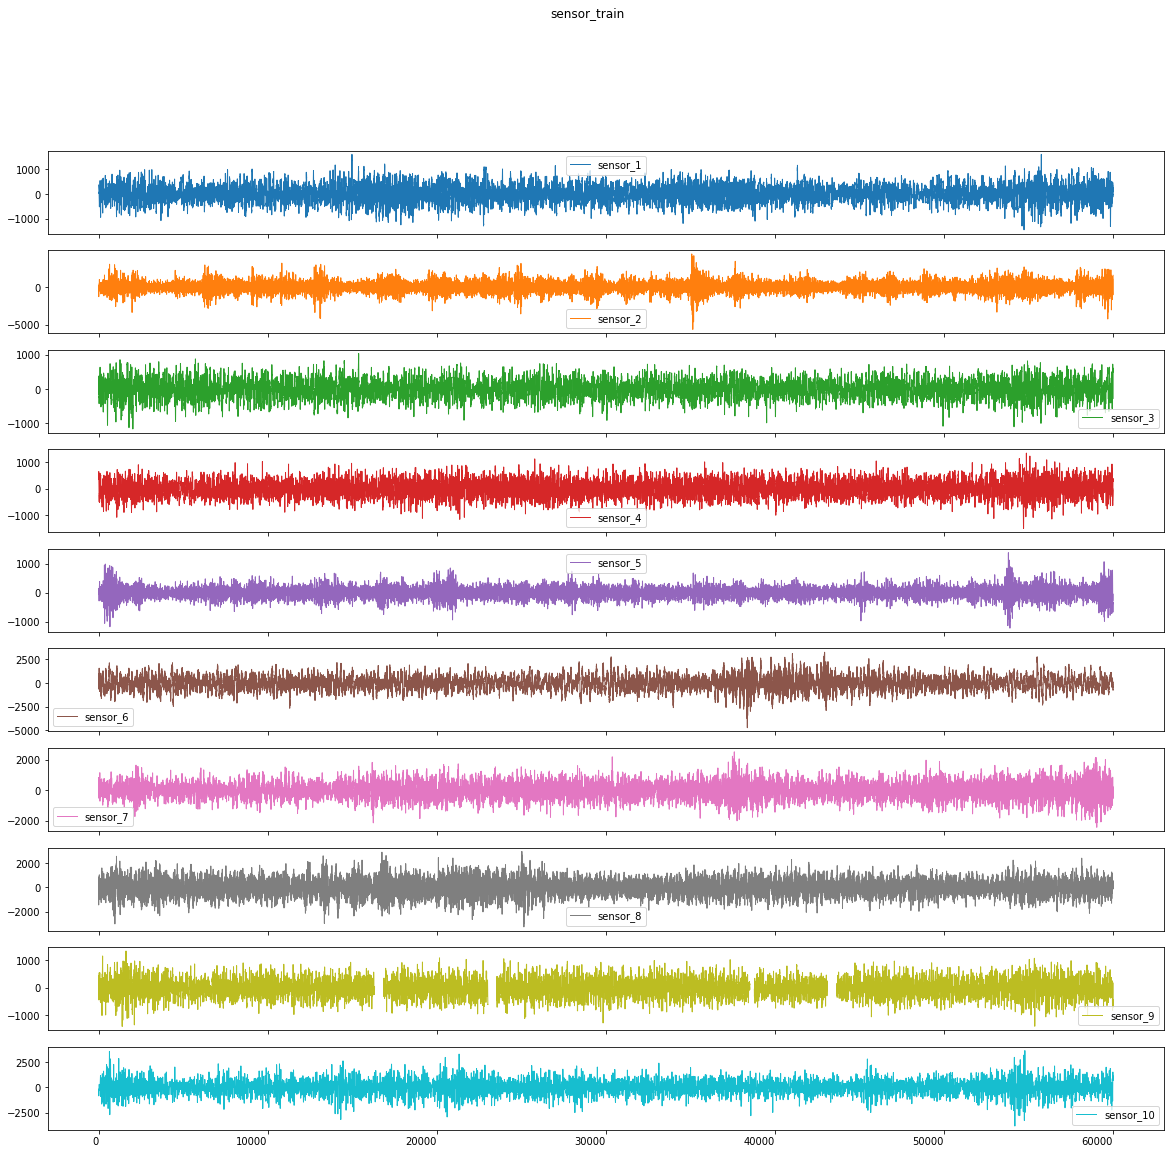

In [118]:
sensor_train.plot(figsize=(20,20),
                       subplots=True, 
                       layout=(10,1),
                       rot=0, 
                       lw=1, 
                       #colormap='jet',
                       title='sensor_train'
                      )

plt.show();

In [119]:
train_data = pd.concat([train,sensor_train],axis = 1)

In [120]:
train_data.head()

,segment_id,time_to_eruption,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,1.136038e+09,12262005.0,362.0,-593.0,-102.0,566.0,12.0,-219.0,839.0,846.0,-66.0,-306.0
1,1.969648e+09,32739612.0,353.0,-654.0,-96.0,523.0,51.0,-48.0,818.0,458.0,3.0,-276.0
2,1.895880e+09,14965999.0,354.0,-444.0,-161.0,453.0,95.0,7.0,661.0,175.0,100.0,-244.0
3,2.068207e+09,26469720.0,318.0,-330.0,-80.0,414.0,129.0,-199.0,475.0,-225.0,214.0,-236.0
4,1.929556e+08,31072429.0,319.0,-344.0,-93.0,372.0,142.0,-468.0,211.0,-426.0,270.0,-254.0


In [121]:
test_data = pd.concat([test , sensor_test],axis = 1)

In [122]:
test_data.head()

,segment_id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,1.000214e+09,NaN,165.0,241.0,537.0,NaN,-352.0,-735.0,192.0,NaN,NaN
1,1.000234e+08,NaN,-250.0,425.0,613.0,NaN,-327.0,-682.0,195.0,NaN,NaN
2,1.000489e+09,NaN,-527.0,-874.0,194.0,NaN,-335.0,-670.0,190.0,NaN,NaN
3,1.001029e+09,NaN,-258.0,748.0,11.0,NaN,-365.0,-660.0,142.0,NaN,NaN
4,1.001858e+09,NaN,-75.0,-1389.0,478.0,NaN,-386.0,-620.0,458.0,NaN,NaN


In [33]:
train_data.isna().sum()

segment_id          55570
time_to_eruption    55570
sensor_1                0
sensor_2                0
sensor_3                0
sensor_4                0
sensor_5                0
sensor_6                0
sensor_7                0
sensor_8                0
sensor_9             1868
sensor_10               0
dtype: int64

In [34]:
test_data.isna().sum()

segment_id    55481
sensor_1      60001
sensor_2          0
sensor_3          0
sensor_4          0
sensor_5      60001
sensor_6          0
sensor_7          0
sensor_8          0
sensor_9      60001
sensor_10     60001
dtype: int64

In [35]:
for label, content in train_data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            
            
            # Fill missing numeric values with median
            train_data[label] = content.fillna(content.median())

In [36]:
train_data.isna().sum()

segment_id          0
time_to_eruption    0
sensor_1            0
sensor_2            0
sensor_3            0
sensor_4            0
sensor_5            0
sensor_6            0
sensor_7            0
sensor_8            0
sensor_9            0
sensor_10           0
dtype: int64

In [37]:
train_data.head()

,segment_id,time_to_eruption,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,1.136038e+09,12262005.0,362.0,-593.0,-102.0,566.0,12.0,-219.0,839.0,846.0,-66.0,-306.0
1,1.969648e+09,32739612.0,353.0,-654.0,-96.0,523.0,51.0,-48.0,818.0,458.0,3.0,-276.0
2,1.895880e+09,14965999.0,354.0,-444.0,-161.0,453.0,95.0,7.0,661.0,175.0,100.0,-244.0
3,2.068207e+09,26469720.0,318.0,-330.0,-80.0,414.0,129.0,-199.0,475.0,-225.0,214.0,-236.0
4,1.929556e+08,31072429.0,319.0,-344.0,-93.0,372.0,142.0,-468.0,211.0,-426.0,270.0,-254.0


In [38]:
for label, content in test_data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            
            
            # Fill missing numeric values with median
            test_data[label] = content.fillna(content.median())

In [39]:
test_data.isna().sum()

segment_id        0
sensor_1      60001
sensor_2          0
sensor_3          0
sensor_4          0
sensor_5      60001
sensor_6          0
sensor_7          0
sensor_8          0
sensor_9      60001
sensor_10     60001
dtype: int64

In [40]:
train_data.shape , test_data.shape

((60001, 12), (60001, 11))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


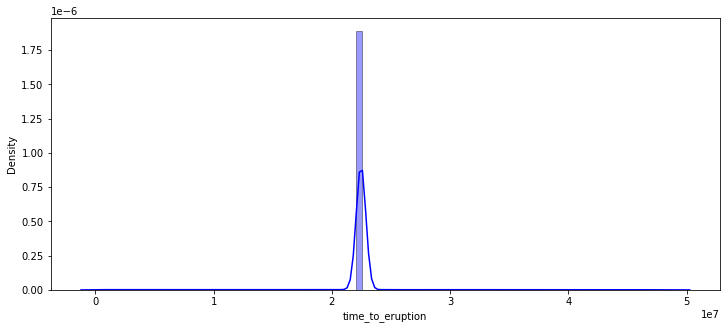

In [98]:
sns.distplot(train_data['time_to_eruption'], 
             hist=True, 
             kde=True, 
             bins=100, 
             color = 'blue', 
             hist_kws={'edgecolor':'black'})

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


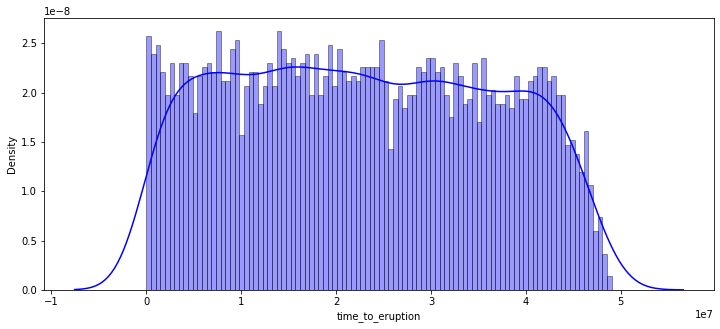

In [45]:
sns.distplot(train['time_to_eruption'], 
             hist=True, 
             kde=True, 
             bins=100, 
             color = 'blue', 
             hist_kws={'edgecolor':'black'})

In [123]:
train_data

,segment_id,time_to_eruption,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,1.136038e+09,12262005.0,362.0,-593.0,-102.0,566.0,12.0,-219.0,839.0,846.0,-66.0,-306.0
1,1.969648e+09,32739612.0,353.0,-654.0,-96.0,523.0,51.0,-48.0,818.0,458.0,3.0,-276.0
2,1.895880e+09,14965999.0,354.0,-444.0,-161.0,453.0,95.0,7.0,661.0,175.0,100.0,-244.0
3,2.068207e+09,26469720.0,318.0,-330.0,-80.0,414.0,129.0,-199.0,475.0,-225.0,214.0,-236.0
4,1.929556e+08,31072429.0,319.0,-344.0,-93.0,372.0,142.0,-468.0,211.0,-426.0,270.0,-254.0
...,...,...,...,...,...,...,...,...,...,...,...,...
59996,NaN,NaN,129.0,939.0,144.0,318.0,-343.0,-572.0,142.0,216.0,-712.0,825.0
59997,NaN,NaN,-30.0,1247.0,33.0,322.0,-349.0,-541.0,50.0,352.0,-707.0,925.0
59998,NaN,NaN,24.0,1348.0,-82.0,382.0,-369.0,-764.0,-129.0,419.0,-656.0,1026.0
59999,NaN,NaN,-17.0,1412.0,-214.0,339.0,-387.0,-740.0,-244.0,347.0,-560.0,1093.0


In [124]:
X = train_data.drop(['segment_id','time_to_eruption'],axis = 1)
y = train_data['time_to_eruption']

In [125]:
X

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,362.0,-593.0,-102.0,566.0,12.0,-219.0,839.0,846.0,-66.0,-306.0
1,353.0,-654.0,-96.0,523.0,51.0,-48.0,818.0,458.0,3.0,-276.0
2,354.0,-444.0,-161.0,453.0,95.0,7.0,661.0,175.0,100.0,-244.0
3,318.0,-330.0,-80.0,414.0,129.0,-199.0,475.0,-225.0,214.0,-236.0
4,319.0,-344.0,-93.0,372.0,142.0,-468.0,211.0,-426.0,270.0,-254.0
...,...,...,...,...,...,...,...,...,...,...
59996,129.0,939.0,144.0,318.0,-343.0,-572.0,142.0,216.0,-712.0,825.0
59997,-30.0,1247.0,33.0,322.0,-349.0,-541.0,50.0,352.0,-707.0,925.0
59998,24.0,1348.0,-82.0,382.0,-369.0,-764.0,-129.0,419.0,-656.0,1026.0
59999,-17.0,1412.0,-214.0,339.0,-387.0,-740.0,-244.0,347.0,-560.0,1093.0


## Split the data into training and testing

In [171]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 42)

In [166]:
import lightgbm as lgbm
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [167]:
params = {
    'boosting_type': 'gbdt', 
    'num_leaves': 31,
    'max_depth': -1,
    'learning_rate': 0.1,
    'n_estimators': 100, 
    'subsample_for_bin': 200, # 200000 is default 
    #'objective': 'binary'
    'min_split_gain': 0.5,    # 0.0 is default 
    'min_child_weight': 1e-3, 
    'min_child_samples': 20,
    'subsample': 1,
    'colsample_bytree': 1.0,
    'min_data_in_leaf': 20,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'random_state': 42
    #'device': 'cpu', # you can use GPU to achieve faster learning
}

model_lgbm_regr = LGBMRegressor(boosting_type = params['boosting_type'], 
                                num_leaves = params['num_leaves'],
                                max_depth = params['max_depth'],
                                learning_rate = params['learning_rate'],
                                n_estimators = params['n_estimators'],
                                subsample_for_bin = params['subsample_for_bin'],
                                #objective = params['objective'],
                                min_split_gain = params['min_split_gain'], 
                                min_child_weight = params['min_child_weight'], 
                                min_child_samples = params['min_child_samples'],
                                subsample = params['subsample'],
                                colsample_bytree = params['colsample_bytree'],
                                min_data_in_leaf = params['min_data_in_leaf'],
                                feature_fraction = params['feature_fraction'],
                                bagging_fraction = params['bagging_fraction'],
                                random_state = params['random_state'],
                                #n_jobs = 5, 
                                silent = True
                               )

# To view the default model parameters:
model_lgbm_regr.get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq', 'min_data_in_leaf', 'feature_fraction', 'bagging_fraction'])

In [172]:
model_lgbm_regr.fit(X_train,y_train)

LGBMRegressor(bagging_fraction=1.0, boosting_type='gbdt', class_weight=None,
              colsample_bytree=1.0, feature_fraction=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=20,
              min_split_gain=0.5, n_estimators=100, n_jobs=-1, num_leaves=31,
              objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1, subsample_for_bin=200,
              subsample_freq=0)

## Grid search

In [173]:
gridParams = {
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy might try dart, check both
    'num_leaves': [10,31,50],        # large num_leaves helps improve accuracy but might lead to over-fitting
    'max_depth': [10,-1],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample_for_bin': [200],
    'objective' : ['binary'],
    'min_split_gain': [0.5],    # 0.0 is default 
    'min_child_weight': [1e-3], 
    'min_child_samples': [20],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_data_in_leaf': [10, 20],
    'feature_fraction': [0.8, 1.0],
    'bagging_fraction': [0.8, 1.0],
    'random_state' : [42],
    }
grid = GridSearchCV(model_lgbm_regr, 
                    gridParams, 
                    cv=5, 
                    verbose=1, 
                    n_jobs=-1)

# Run the grid
grid.fit(X_train, y_train)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


ValueError: ignored

## Best model selection

In [51]:
params['boosting_type'] = grid.best_params_['boosting_type']
params['num_leaves'] = grid.best_params_['num_leaves']
params['max_depth'] = grid.best_params_['max_depth']
params['learning_rate'] = grid.best_params_['learning_rate']
params['n_estimators'] = grid.best_params_['n_estimators']
params['subsample_for_bin'] = grid.best_params_['subsample_for_bin']
params['objective'] = grid.best_params_['objective']
params['min_split_gain'] = grid.best_params_['min_split_gain']
params['min_child_weight'] = grid.best_params_['min_child_weight']
params['min_child_samples'] = grid.best_params_['min_child_samples']
params['subsample'] = grid.best_params_['subsample']
params['colsample_bytree'] = grid.best_params_['colsample_bytree']
params['min_data_in_leaf'] = grid.best_params_['min_data_in_leaf']
params['feature_fraction'] = grid.best_params_['feature_fraction']
params['bagging_fraction'] = grid.best_params_['bagging_fraction']
params['random_state'] = grid.best_params_['random_state']

In [52]:
model_lgbm_regr.fit(X_train, y_train, 
                  eval_set= [(X_train, y_train), (X_test, y_test)], 
                    eval_metric="mae", 
                    verbose=200, 
                    early_stopping_rounds=50
                   )

Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[1]	training's l2: 1.33397e+13	training's l1: 889100	valid_1's l2: 1.37278e+13	valid_1's l1: 906705


LGBMRegressor(bagging_fraction=1.0, boosting_type='gbdt', class_weight=None,
              colsample_bytree=1.0, feature_fraction=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=20,
              min_split_gain=0.5, n_estimators=100, n_jobs=-1, num_leaves=31,
              objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1, subsample_for_bin=200,
              subsample_freq=0)

In [54]:
dtrain = lgbm.Dataset(X_train, label=y_train)
dtest = lgbm.Dataset(X_test, label=y_test) 

In [55]:
model_lgbm = lgbm.train(params, 
                        train_set=dtrain, 
                        num_boost_round=100, 
                        valid_sets=[dtest, dtrain], 
                        early_stopping_rounds=20, 
                        verbose_eval=4
                       )

Training until validation scores don't improve for 20 rounds.
[4]	training's binary_logloss: 0	valid_0's binary_logloss: 0
[8]	training's binary_logloss: 0	valid_0's binary_logloss: 0
[12]	training's binary_logloss: 0	valid_0's binary_logloss: 0
[16]	training's binary_logloss: 0	valid_0's binary_logloss: 0
[20]	training's binary_logloss: 0	valid_0's binary_logloss: 0
Early stopping, best iteration is:
[1]	training's binary_logloss: 0	valid_0's binary_logloss: 0


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [56]:
model_lgbm

In [57]:
test_data

,segment_id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,1.000214e+09,NaN,165.0,241.0,537.0,NaN,-352.0,-735.0,192.0,NaN,NaN
1,1.000234e+08,NaN,-250.0,425.0,613.0,NaN,-327.0,-682.0,195.0,NaN,NaN
2,1.000489e+09,NaN,-527.0,-874.0,194.0,NaN,-335.0,-670.0,190.0,NaN,NaN
3,1.001029e+09,NaN,-258.0,748.0,11.0,NaN,-365.0,-660.0,142.0,NaN,NaN
4,1.001858e+09,NaN,-75.0,-1389.0,478.0,NaN,-386.0,-620.0,458.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
59996,1.060695e+09,NaN,-527.0,-3071.0,-429.0,NaN,-9.0,-467.0,242.0,NaN,NaN
59997,1.060695e+09,NaN,314.0,-1958.0,-463.0,NaN,6.0,-452.0,-35.0,NaN,NaN
59998,1.060695e+09,NaN,524.0,-2712.0,-559.0,NaN,-18.0,-540.0,42.0,NaN,NaN
59999,1.060695e+09,NaN,-317.0,-2636.0,-311.0,NaN,-53.0,-704.0,-12.0,NaN,NaN


In [65]:
y_train.shape

(48000,)

In [74]:
y_preds = model_lgbm_regr.predict(X_train)
#predictions  = model_lgbm.predict(test_data.drop(columns=['segment_id']))


In [75]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_train , y_preds)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

3652361.68268489

In [69]:
test_data.shape

(60001, 11)

In [70]:
train_data.shape

(60001, 12)

In [64]:
predictions.shape

(60001,)

In [ ]:
submission = pd.DataFrame()
submission['segment_id'] = test_data["segment_id"]
submission['time_to_eruption'] = predictions
submission.to_csv('submission.csv', header=True, index=False)

In [ ]:
submission.head()

,segment_id,time_to_eruption
0,1.000214e+09,1.0
1,1.000234e+08,1.0
2,1.000489e+09,1.0
3,1.001029e+09,1.0
4,1.001858e+09,1.0


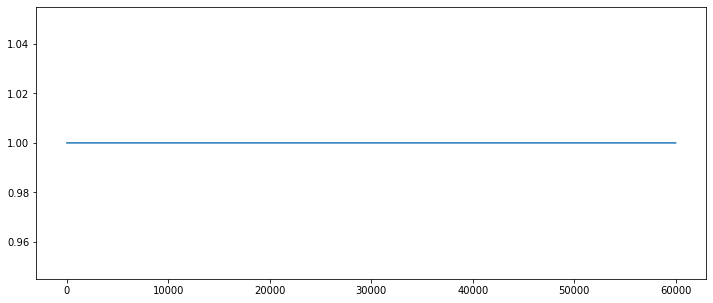

In [ ]:
submission['time_to_eruption'].plot();